# Embedding Visualizations*
by: Jack Skupien

*\*Note: to get a more interactive 3d-visualization,run desired scripts in this directory individually*

### Imports and Initialization

In [ ]:
#math/parsing
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#visualization
import matplotlib.pyplot as plt         #visualizing
from mpl_toolkits.mplot3d import Axes3D #3d visualizing
plt.style.use('dark_background')        #dark mode
plt.subplots_adjust(wspace=-10)           #tighter layout

#debugging
import os                               #listdir
import csv                              #for format_file()

#path initialization (Change if running elsewhere)
path="../../Embeddings"
dirEntries=os.listdir(path)
#preview directory to ensure we're in the right place
print("Current Directory:")
for entry in dirEntries:
    print("\t- "+entry)

# NOTE-- Ensure the output below contains (at least) the following; otherwise, this notebook won't work as intended")
# Current Directory:
#       - T5_sum_embeddings.csv
#       - Gemini_sum_embeddings.csv
#       - Pegasus_sum_embeddings.csv
#       - Bart_sum_embeddings.csv


Current Directory:
	- Pegasus_sum_embeddings-clean.csv
	- T5_sum_embeddings.csv
	- T5_sum_embeddings-clean.csv
	- Gemini_sum_embeddings.csv
	- raw_reports_embeddings.csv
	- Bart_sum_embeddings-clean.csv
	- Gemini_sum_embeddings-clean.csv
	- Pegasus_sum_embeddings.csv
	- Bart_sum_embeddings.csv

NOTE-- Ensure the above output contains (at least) the following; otherwise, this notebook won't work as intended

Current Directory:      
	 - T5_sum_embeddings.csv      
	 - Gemini_sum_embeddings.csv      
	 - raw_reports_embeddings.csv      
	 - Pegasus_sum_embeddings.csv      
	 - Bart_sum_embeddings.csv


<Figure size 640x480 with 0 Axes>

## A Function to Remove Newlines/Carriage Returns From a CSV File
(some of the generated CSV files feature a bunch of newlines that make the comma-separation functionality impossible for a program to read)

ARG USAGE:
* `path`: (string) relative path to the file you want to format
* `file`: (string) name of the file you want to format*
* `verbose`: (bool) prints more output when set to `True`

*\*NOTE: do not include ".csv" at the end*

In [7]:
def format_file(path="../../Embeddings/",file="Gemini_sum_embeddings",verbose=True):
    # Paths
    input_path=path + file + ".csv"
    output_path=path + file + "-clean.csv"

    # Open the input and output files
    with open(input_path,'r',encoding='utf-8',newline='') as infile,\
         open(output_path,'w',encoding='utf-8',newline='') as outfile:

        reader=csv.reader(infile)
        writer=csv.writer(outfile,quoting=csv.QUOTE_ALL)

        header=next(reader)  # Read the header
        writer.writerow(header)  # Write the header unchanged

        for row in reader:
            if len(row) != 2:
                continue  # Skip bad rows

            # Remove internal newlines from both fields
            clean_row=[field.replace('\n',' ').replace('\r',' ') for field in row]
            writer.writerow(clean_row)

    if verbose:
        print(f"Cleaned CSV saved to {output_path}")

## Embeddings Visualization Function
ARG USAGE:
* `preview_dir`: (bool) set to `True` to show a few lines from the CSV as a preview (default: `True`)
* `two_dim`: (bool) set to `True` to show 2D visualization (default: `True`)
* `three_dim`: (bool) set to `True` to show 3D visualization (default: `True`)
* `path`: (string) the path to the directory of the desired embeddings folder (ex. `'../../Embeddings'`)
* `type`: (string) the type of embedding (ex. `"Bart"`)
* `figWidth`: (int) the width of the ouput figure (default=18)
* `figHeight`: (int) the width of the ouput figure (default=6)

In [8]:
def visualize_embeddings(preview_dir=True,two_dim=True,three_dim=True,path='../../Embeddings',type="",figWidth=20,figHeight=12):
    #print header
    print(f"-----------------------{type} Visualizations-----------------------")

    #clean embeddings CSV
    file=f"/{type}_sum_embeddings"
    format_file(path=path,file=file,verbose=False)
    path=path+"/"+file+"-clean.csv"
    
    #read CSV
    df=pd.read_csv(path)

    #print first few rows
    if preview_dir:
        print(df.head())

    #convert embeddings of the format "[0.1,0.2,...,0.5]" to lists
    if isinstance(df.iloc[0]['EMBEDDING'],str):
        df['EMBEDDING']=df['EMBEDDING'].apply(lambda x: np.array(eval(x)))

    #stack embeddings into a 2D array
    embeddings=np.stack(df['EMBEDDING'].values)

    #Reduce dimensions (Deciding between PCA for speed and TSNE for prettier separation)
    pca_2d=PCA(n_components=2)
    embeddings_2d=pca_2d.fit_transform(embeddings)

    pca_3d=PCA(n_components=3)
    embeddings_3d=pca_3d.fit_transform(embeddings)

    # tsne=TSNE(n_components=2,random_state=42)
    # embeddings_2d=tsne.fit_transform(embeddings)

    #graph
    if two_dim and three_dim:#graph together as subplots
        fig=plt.figure(figsize=(figWidth,figHeight))

        #------------------ 2D Visualization ------------------#
        ax1=fig.add_subplot(1,2,1)
        ax1.scatter(embeddings_2d[:, 0],embeddings_2d[:, 1],alpha=0.6,c='lime')
        ax1.set_title(f'2D PCA of {type} Summarization Embeddings')
        ax1.set_xlabel('Component 1')
        ax1.set_ylabel('Component 2')
        ax1.grid(True)

        #------------------ 3D Visualization ------------------#
        ax2=fig.add_subplot(1,2,2,projection='3d')
        ax2.scatter(embeddings_3d[:,0],embeddings_3d[:, 1],embeddings_3d[:,2],alpha=0.6,c='lime')
        ax2.set_title(f'3D PCA of {type} Summarization Embeddings')
        ax2.set_xlabel('Component 1')
        ax2.set_ylabel('Component 2')
        ax2.set_zlabel('Component 3')

        plt.tight_layout()
        plt.show()

    else:
        if two_dim:
            #------------------ 2D Visualization ------------------#
            plt.figure(figsize=(10,7))
            plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1],alpha=0.6,c='lime')
            plt.title(f'2D Visualization of {type} Summarization Embeddings (PCA)')
            plt.xlabel('Component 1')
            plt.ylabel('Component 2')
            plt.grid(True)
            plt.show()

        if three_dim:
            #------------------ 3D Visualization ------------------#
            fig = plt.figure(figsize=(12,9))
            ax = fig.add_subplot(111,projection='3d')
            ax.scatter(embeddings_3d[:,0],embeddings_3d[:,1],embeddings_3d[:,2],alpha=0.6,c='lime')
            ax.set_title(f'3D Visualization of {type} Summarization Embeddings (PCA)')
            ax.set_xlabel('Component 1')
            ax.set_ylabel('Component 2')
            ax.set_zlabel('Component 3')
            plt.show()

## Show All Embedding Visualizations

-----------------------Bart Visualizations-----------------------


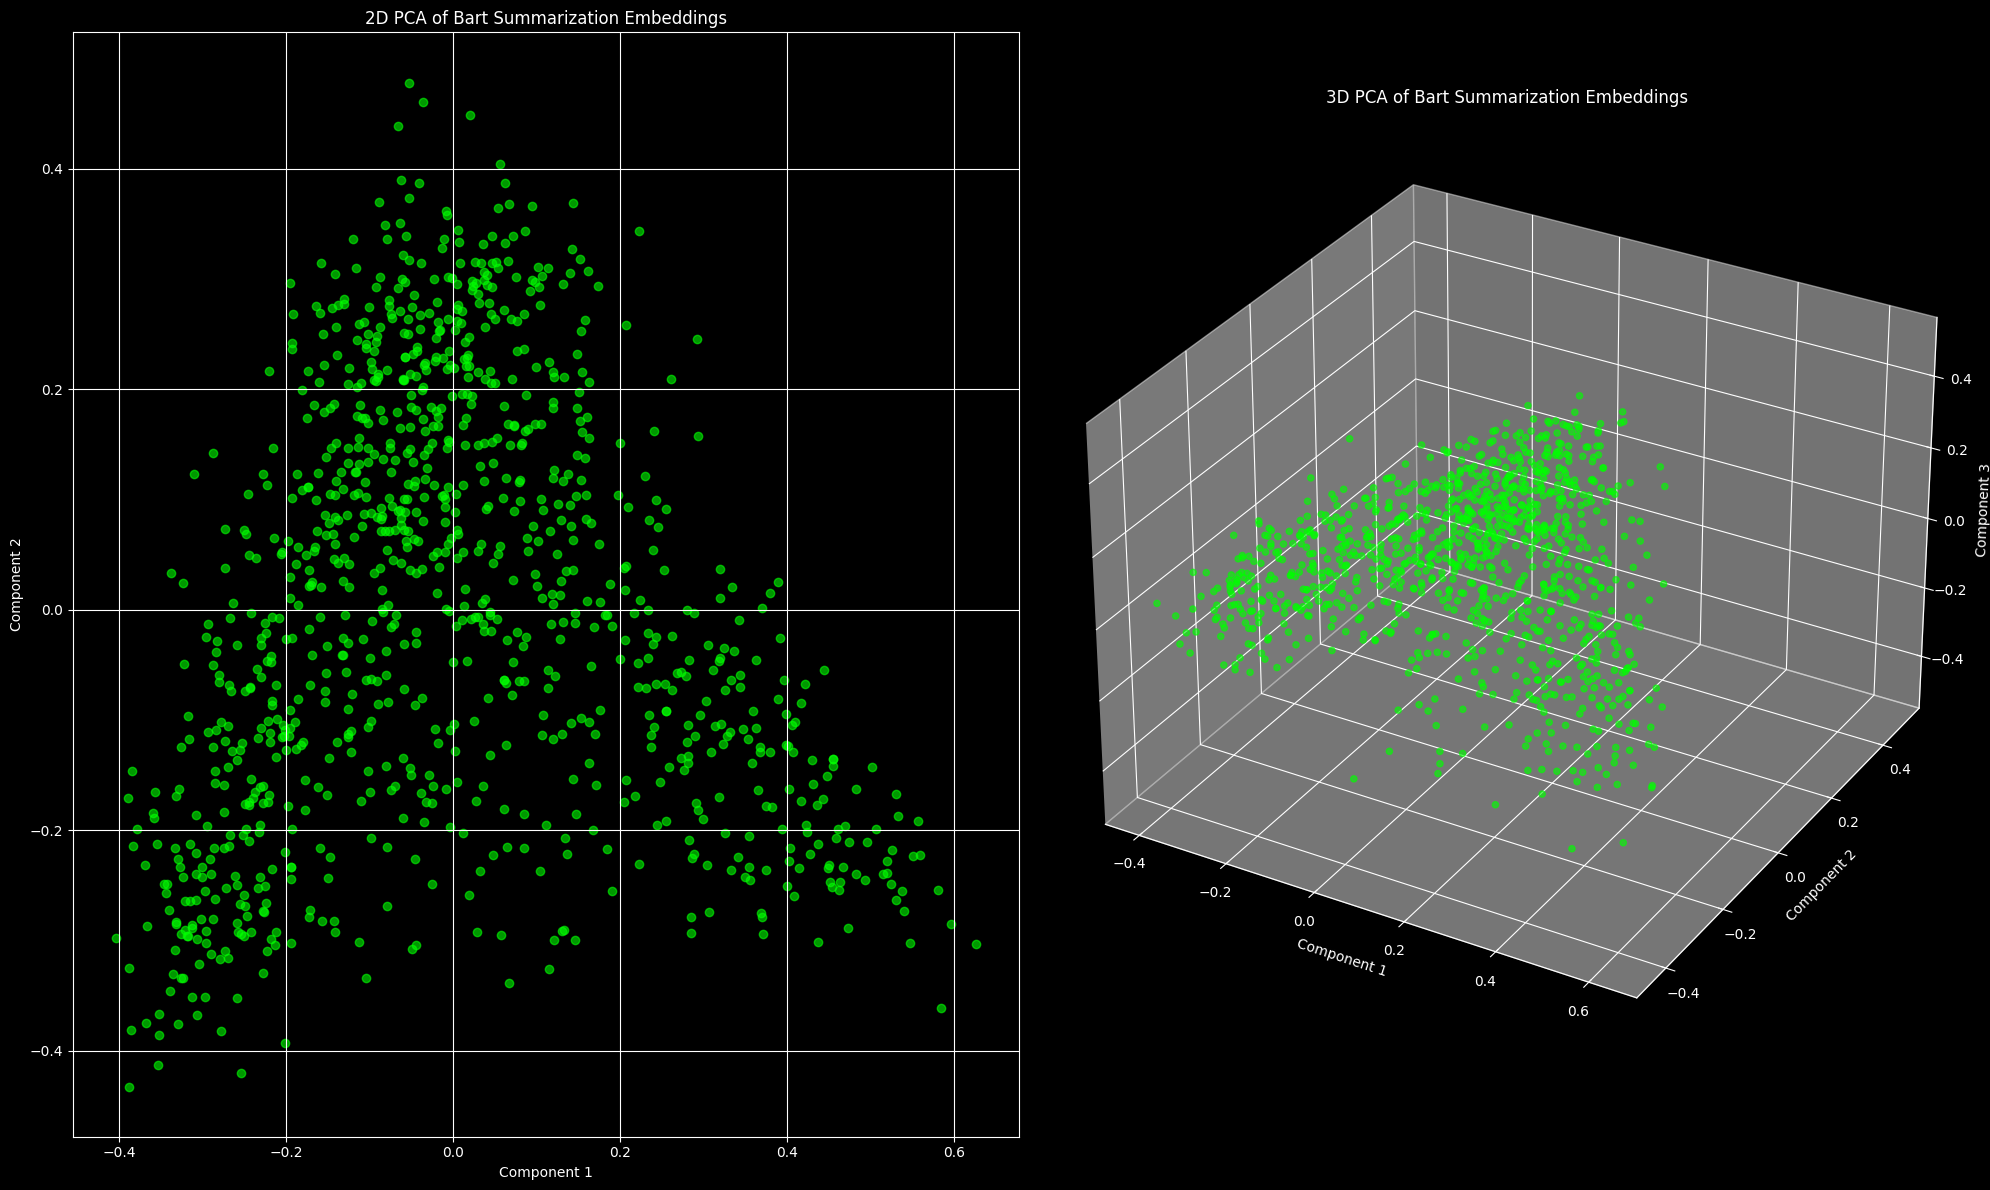

-----------------------Gemini Visualizations-----------------------


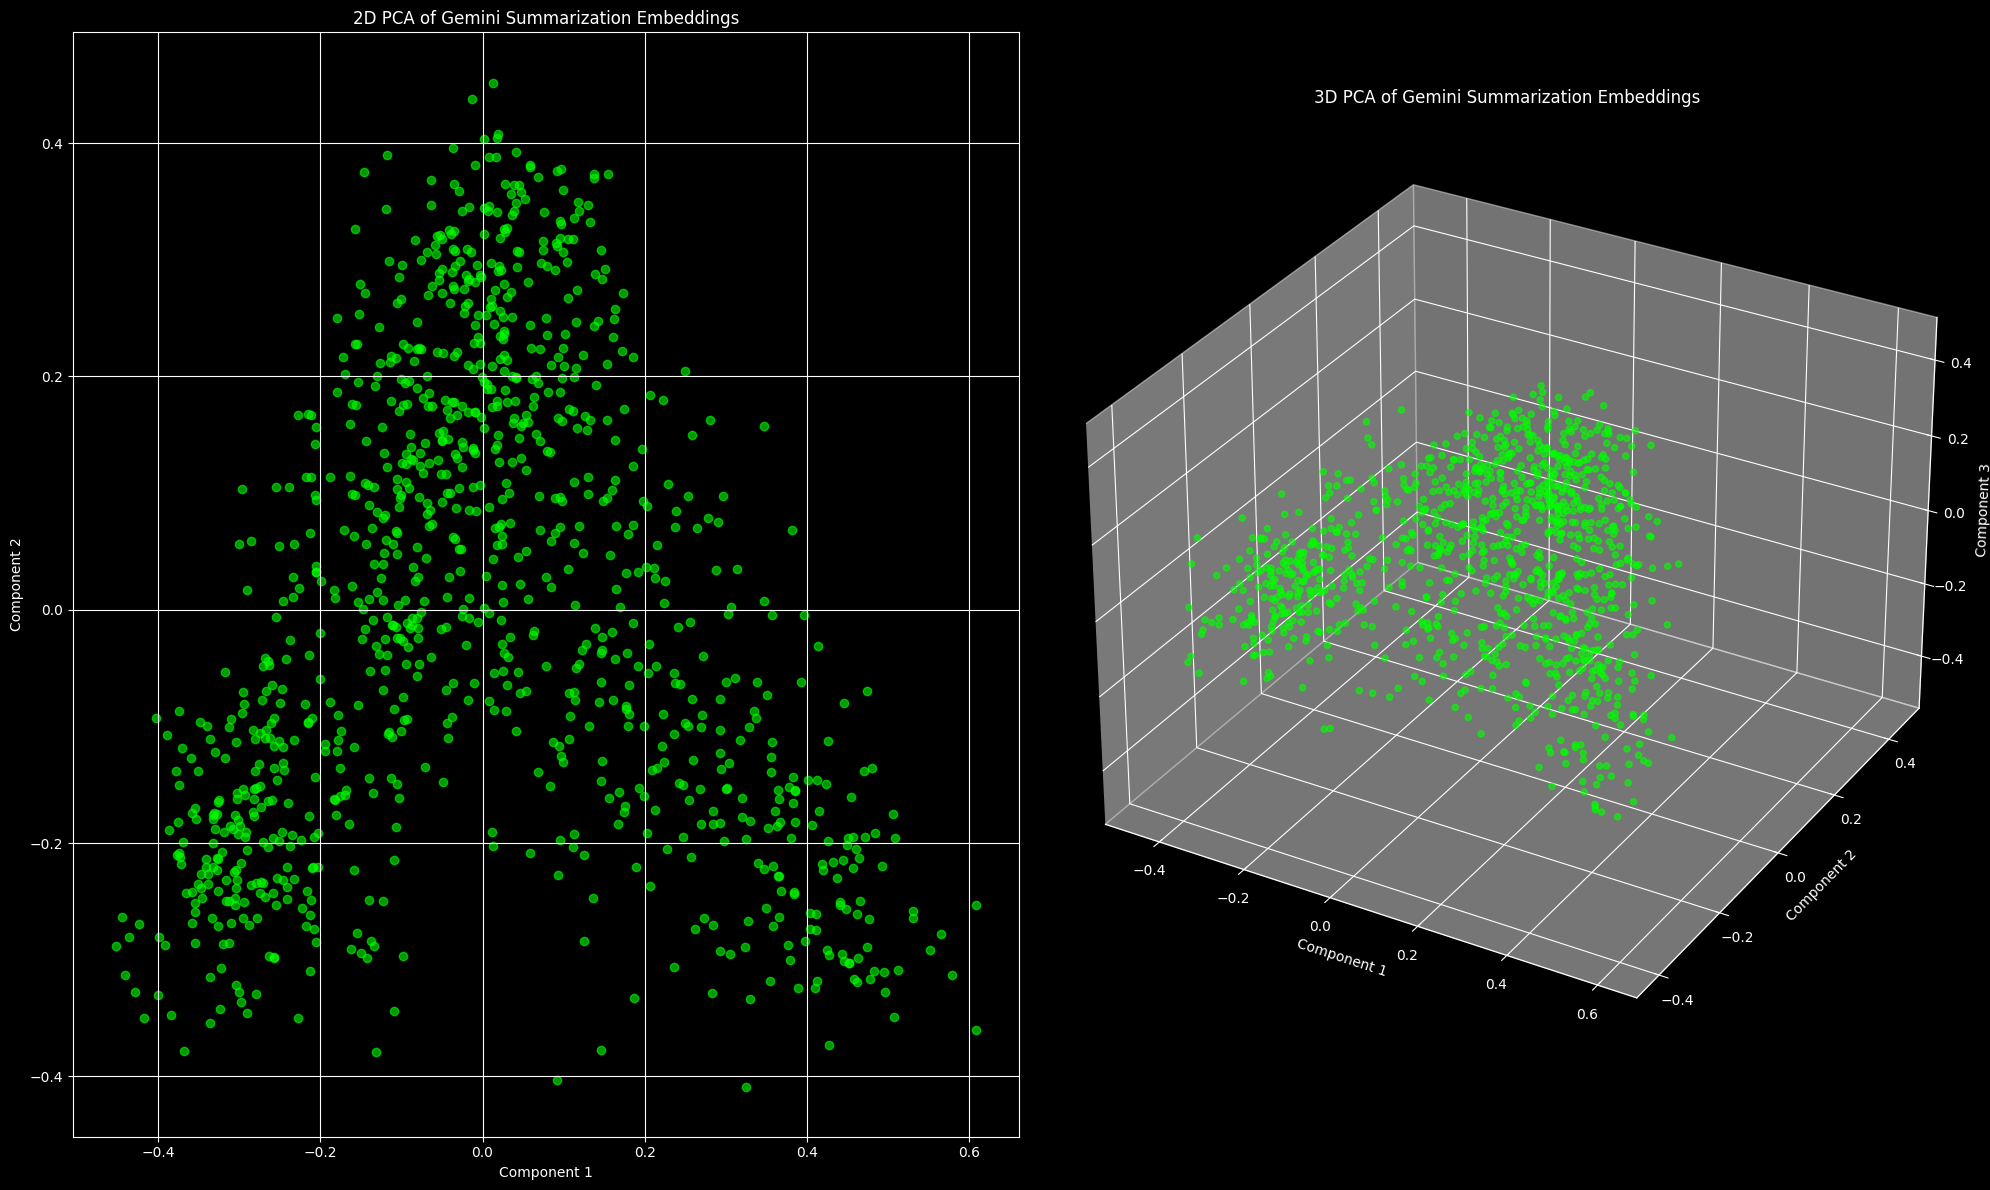

-----------------------T5 Visualizations-----------------------


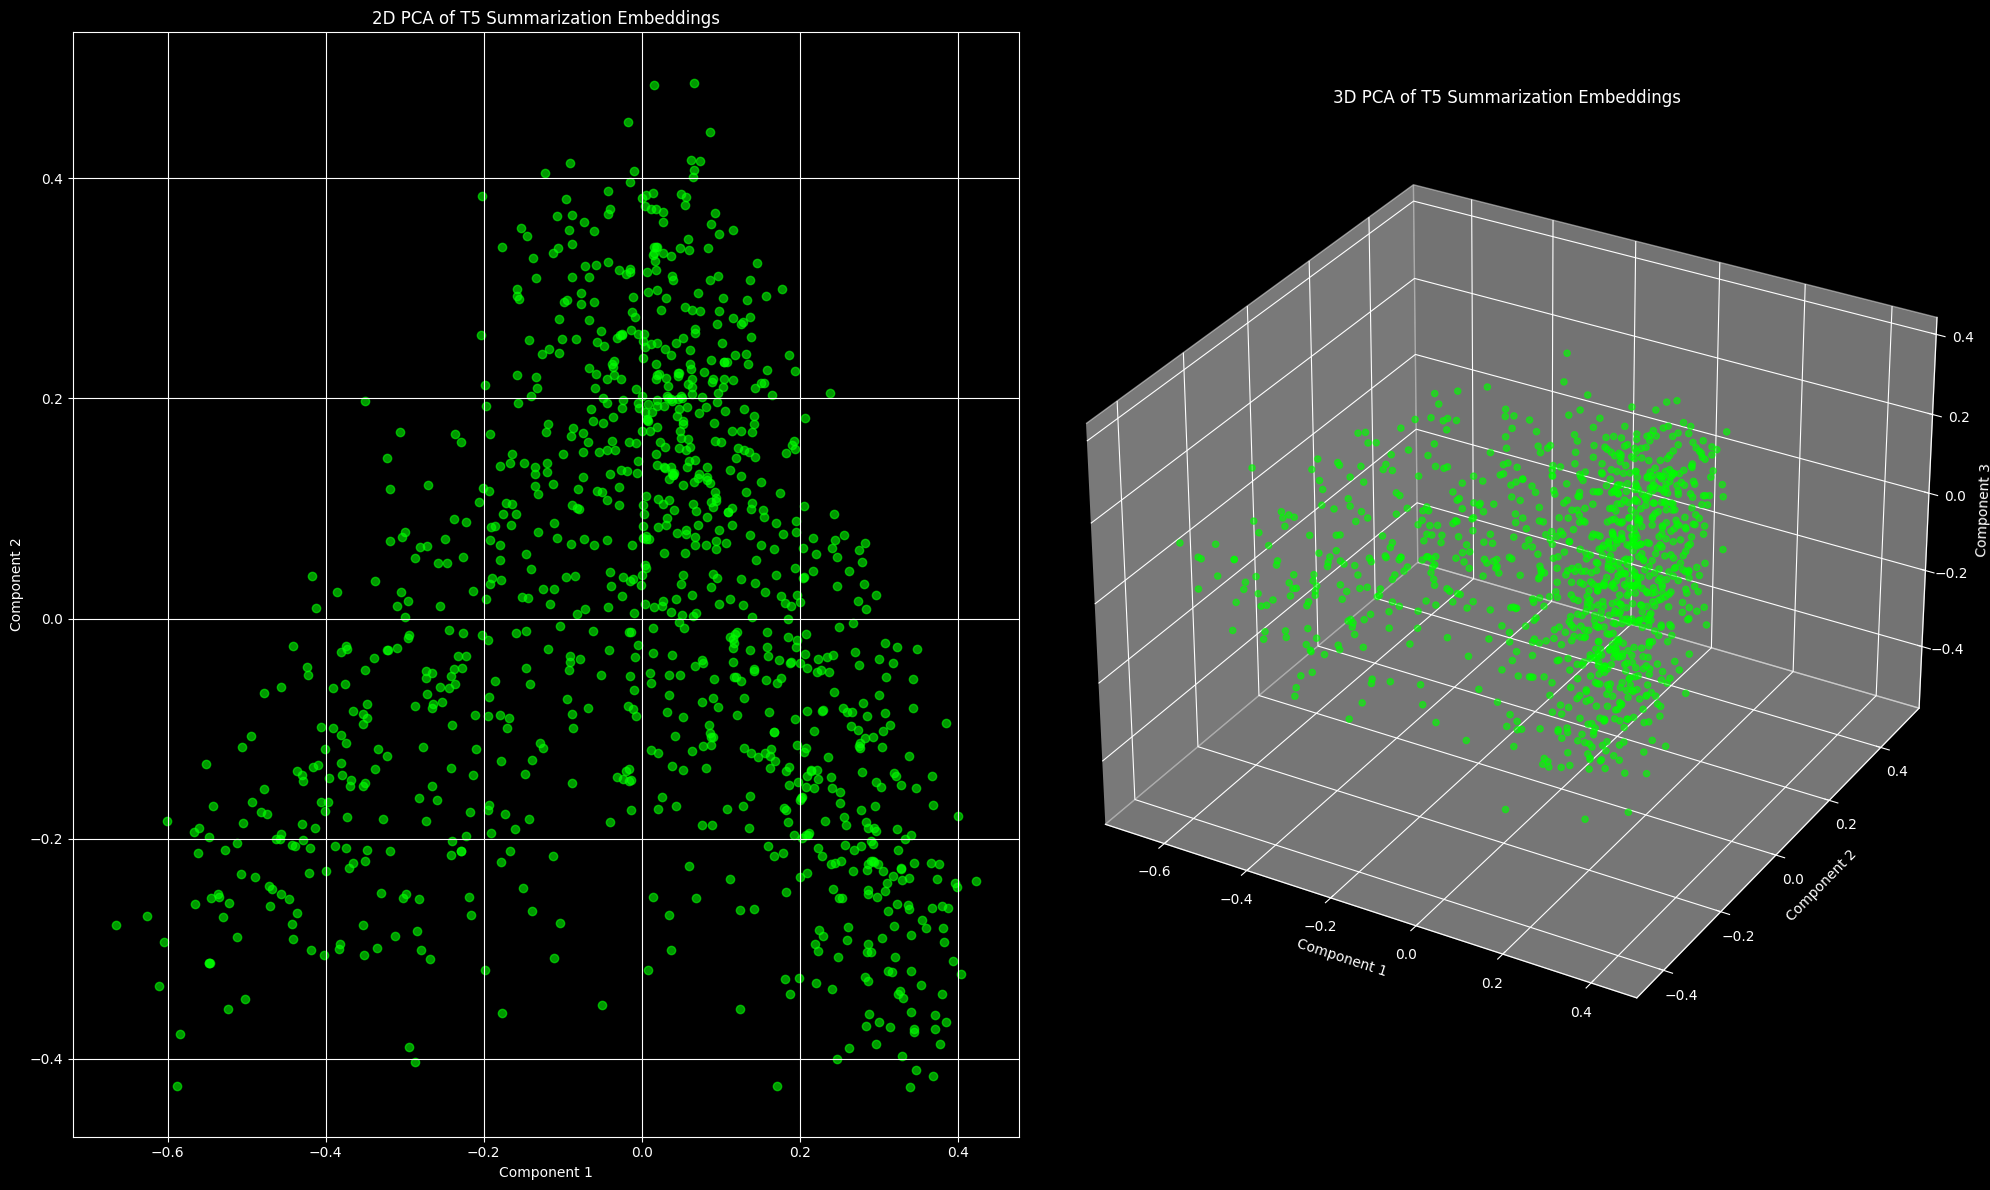

-----------------------Pegasus Visualizations-----------------------


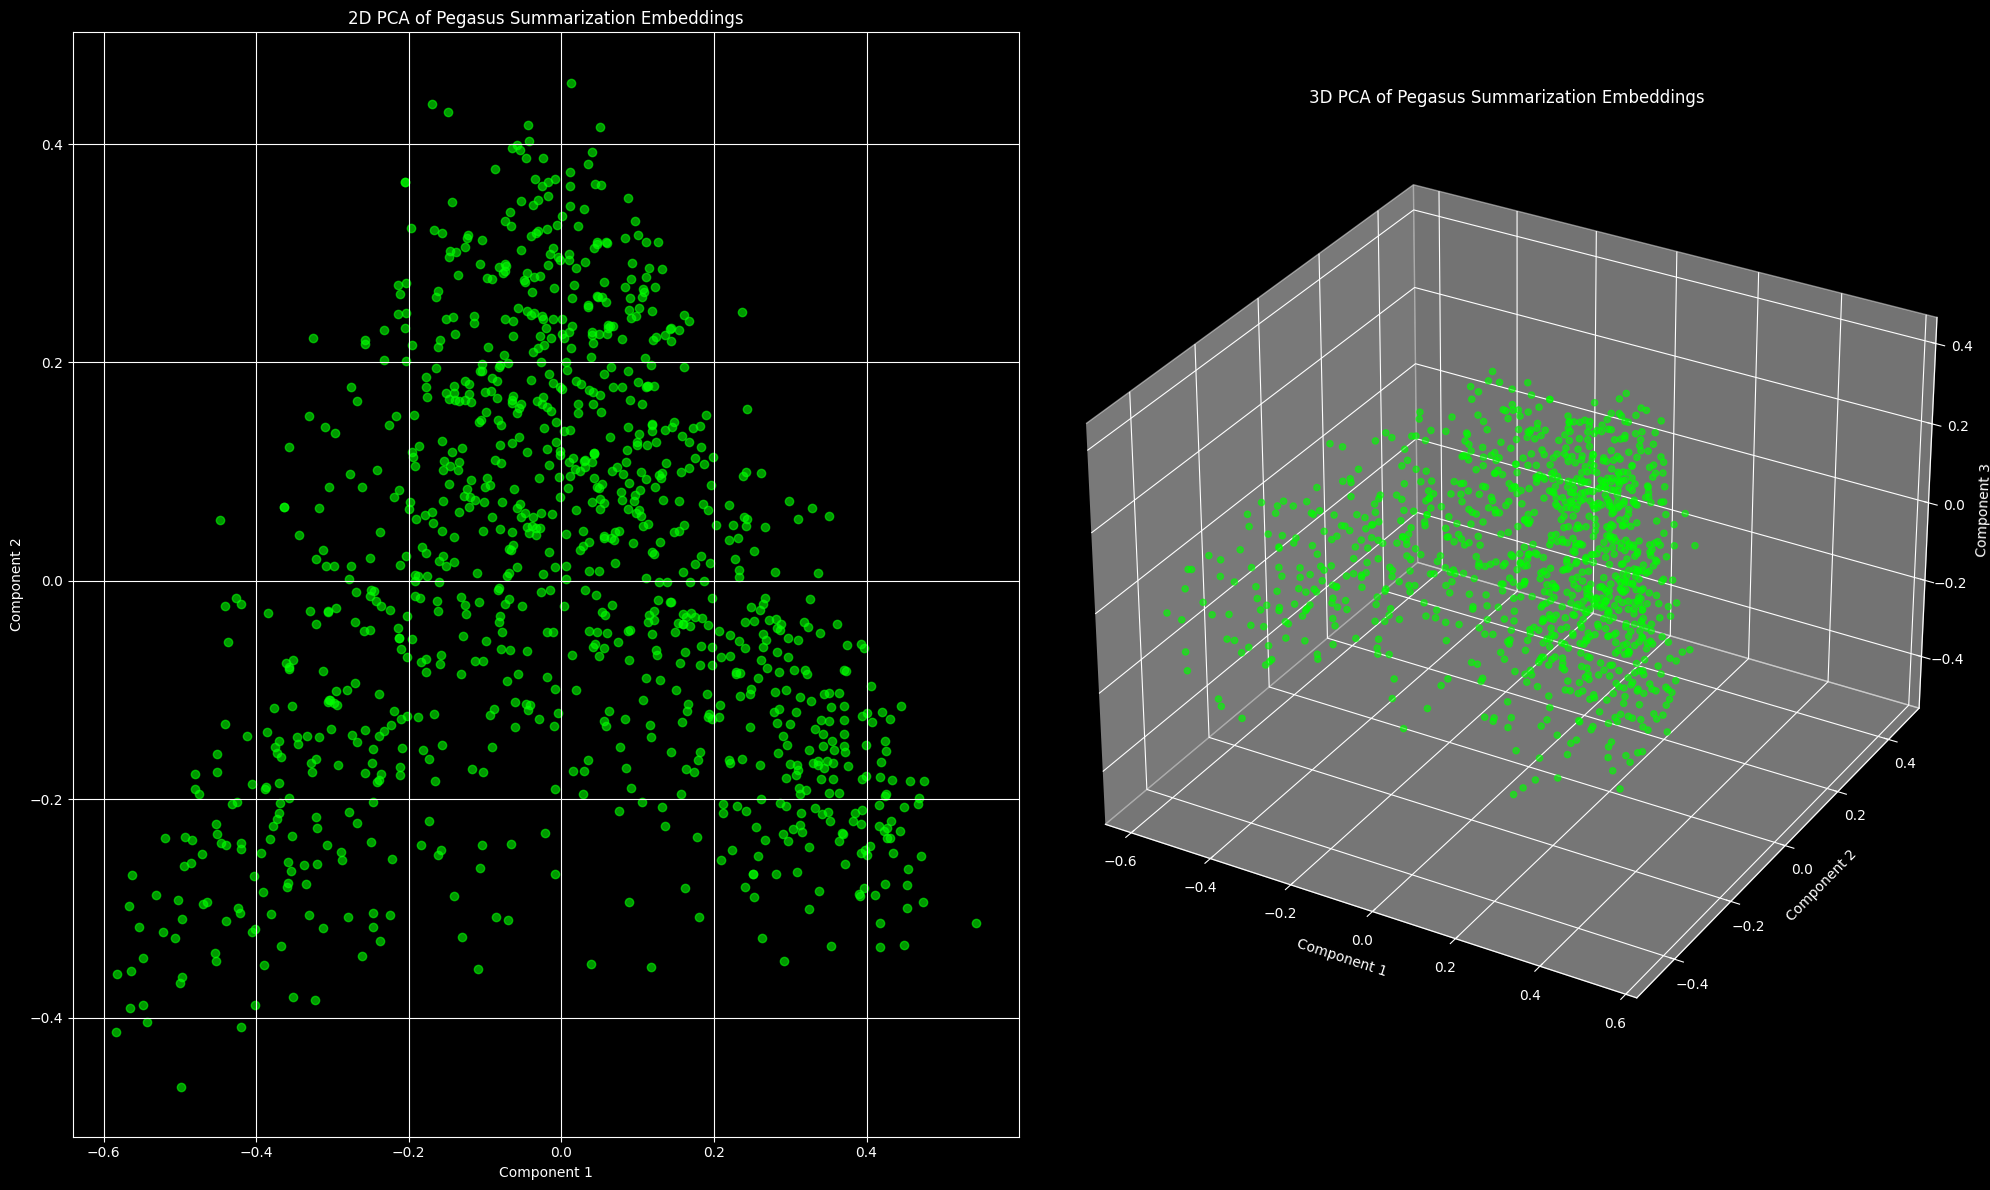

In [9]:
types={"Bart","Gemini","Pegasus","T5"}
#visualize (will, by default, show both 2d and 3d)
for type in types:
    visualize_embeddings(path=path,type=type,preview_dir=False)

# Scoring Visualizations
<!-- *By: Jack Skupien* -->

### Gather and Clean the Score CSVs

In [10]:
#small helper function, so I don't have to write this code 3 times
def ls(path):
    files=os.listdir(path)
    print(f"Files in {path}")
    for file in files:
        #print file name
        print(f"\t- {file}")
    print('\n')
    return files

#Initialize path and files
path="../../Scores/"
files=ls(path)
# fileNames=[file[0:-4] for file in files]

#clean the CSVs
for file in files:
    #ignore files that are already cleaned, so they are overwritten
    if "-clean" in file:
        continue
    #truncate the file type from the end
    file=file[0:-4]
    format_file(path=path,file=file,verbose=False)

#check to make sure we did it
files=ls(path)
cleanFiles=[]
for file in files:
    if "-clean" in file:
        cleanFiles.append(file[0:-4])

Files in ../../Scores/
	- Pegasus_temp_BERT_score.csv
	- Bart_temp_BERT_score-clean.csv
	- T5_temp_Bert_score.csv
	- gemini_sum_scores.csv
	- gemini_sum_scores-clean.csv
	- T5_temp_Bert_score-clean.csv
	- Bart_sum_scores-clean.csv
	- Bart_temp_BERT_score.csv
	- Gemini_temp_BERT_score-clean.csv
	- Bart_sum_scores.csv
	- Pegasus_sum_scores.csv
	- Pegasus_temp_BERT_score-clean.csv
	- Pegasus_sum_scores-clean.csv
	- Gemini_temp_BERT_score.csv
	- T5_sum_scores-clean.csv
	- T5_sum_scores.csv


Files in ../../Scores/
	- Pegasus_temp_BERT_score.csv
	- Bart_temp_BERT_score-clean.csv
	- T5_temp_Bert_score.csv
	- gemini_sum_scores.csv
	- gemini_sum_scores-clean.csv
	- T5_temp_Bert_score-clean.csv
	- Bart_sum_scores-clean.csv
	- Bart_temp_BERT_score.csv
	- Gemini_temp_BERT_score-clean.csv
	- Bart_sum_scores.csv
	- Pegasus_sum_scores.csv
	- Pegasus_temp_BERT_score-clean.csv
	- Pegasus_sum_scores-clean.csv
	- Gemini_temp_BERT_score.csv
	- T5_sum_scores-clean.csv
	- T5_sum_scores.csv


